In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
# Check for device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 64
lr = 0.0002
z_dim = 100
num_epochs = 200
img_size = 28
img_channels = 1

In [3]:
# Transform for the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
]) 

In [4]:
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [5]:
# Generator model
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, img_size * img_size * img_channels),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x).view(-1, img_channels, img_size, img_size)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Linear(img_size * img_size * img_channels, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x.view(-1, img_size * img_size * img_channels))

In [6]:
# Initialize Generator and Discriminator
gen = Generator(z_dim).to(device)
disc = Discriminator().to(device)

# Optimizers
optimizer_gen = optim.Adam(gen.parameters(), lr=lr)
optimizer_disc = optim.Adam(disc.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

In [7]:
# Function to generate noise for the Generator
def generate_noise(batch_size, z_dim, device):
    return torch.randn(batch_size, z_dim).to(device)

# Function to visualize generated samples
def visualize_fake_images(generator, z_dim, num_images=16):
    noise = generate_noise(num_images, z_dim, device)
    fake_images = generator(noise).detach().cpu()
    grid = torchvision.utils.make_grid(fake_images, normalize=True)
    plt.imshow(grid.permute(1, 2, 0))
    plt.show()

Epoch [1/50] Loss D: 0.1209, Loss G: 5.5588
Epoch [2/50] Loss D: 0.3136, Loss G: 1.9725
Epoch [3/50] Loss D: 0.4540, Loss G: 1.3533
Epoch [4/50] Loss D: 0.6215, Loss G: 2.4500
Epoch [5/50] Loss D: 0.5124, Loss G: 3.3743
Epoch [6/50] Loss D: 0.1429, Loss G: 3.2317
Epoch [7/50] Loss D: 0.3491, Loss G: 2.1056
Epoch [8/50] Loss D: 0.1732, Loss G: 4.2253
Epoch [9/50] Loss D: 0.1888, Loss G: 3.1176
Epoch [10/50] Loss D: 0.2156, Loss G: 3.1395


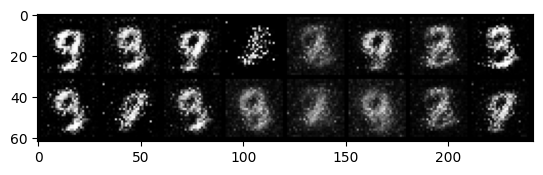

Epoch [11/50] Loss D: 0.4636, Loss G: 3.0921
Epoch [12/50] Loss D: 0.3398, Loss G: 2.3053
Epoch [13/50] Loss D: 0.4094, Loss G: 2.4475
Epoch [14/50] Loss D: 0.2656, Loss G: 2.3861
Epoch [15/50] Loss D: 0.2936, Loss G: 3.3726
Epoch [16/50] Loss D: 0.3782, Loss G: 2.1376
Epoch [17/50] Loss D: 0.2501, Loss G: 2.6698
Epoch [18/50] Loss D: 0.2161, Loss G: 2.5084
Epoch [19/50] Loss D: 0.3249, Loss G: 4.3882
Epoch [20/50] Loss D: 0.2553, Loss G: 3.0876


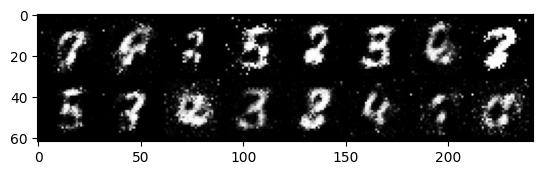

Epoch [21/50] Loss D: 0.3081, Loss G: 2.0125
Epoch [22/50] Loss D: 0.4644, Loss G: 1.9674
Epoch [23/50] Loss D: 0.2346, Loss G: 2.6195
Epoch [24/50] Loss D: 0.3694, Loss G: 1.6055
Epoch [25/50] Loss D: 0.4155, Loss G: 2.0173
Epoch [26/50] Loss D: 0.4369, Loss G: 1.4250
Epoch [27/50] Loss D: 0.2548, Loss G: 1.5897
Epoch [28/50] Loss D: 0.5677, Loss G: 2.0321
Epoch [29/50] Loss D: 0.5548, Loss G: 1.4629
Epoch [30/50] Loss D: 0.4512, Loss G: 1.6930


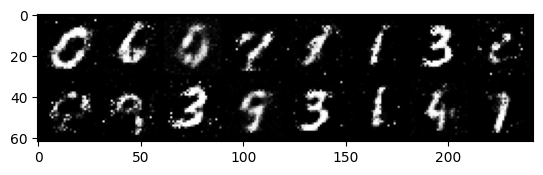

Epoch [31/50] Loss D: 0.4305, Loss G: 1.3406
Epoch [32/50] Loss D: 0.4848, Loss G: 1.8050
Epoch [33/50] Loss D: 0.4621, Loss G: 2.0231
Epoch [34/50] Loss D: 0.3375, Loss G: 1.6756
Epoch [35/50] Loss D: 0.3747, Loss G: 2.0690
Epoch [36/50] Loss D: 0.4915, Loss G: 1.1754
Epoch [37/50] Loss D: 0.4844, Loss G: 1.9250
Epoch [38/50] Loss D: 0.4291, Loss G: 1.4719
Epoch [39/50] Loss D: 0.4105, Loss G: 2.0100
Epoch [40/50] Loss D: 0.5692, Loss G: 1.6114


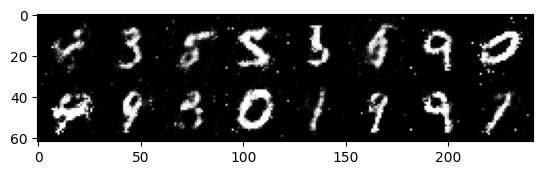

Epoch [41/50] Loss D: 0.5553, Loss G: 1.5823
Epoch [42/50] Loss D: 0.4596, Loss G: 1.6418
Epoch [43/50] Loss D: 0.5757, Loss G: 0.9804
Epoch [44/50] Loss D: 0.4337, Loss G: 1.5426
Epoch [45/50] Loss D: 0.4328, Loss G: 1.4902
Epoch [46/50] Loss D: 0.5974, Loss G: 1.2725
Epoch [47/50] Loss D: 0.4426, Loss G: 1.3546
Epoch [48/50] Loss D: 0.4493, Loss G: 1.5352
Epoch [49/50] Loss D: 0.4663, Loss G: 1.5224
Epoch [50/50] Loss D: 0.5007, Loss G: 1.3852


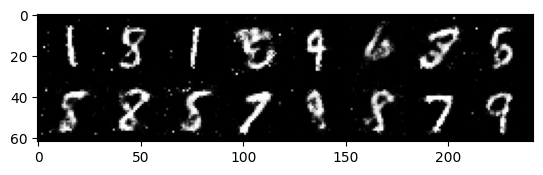

In [8]:
# Lists to store loss values
loss_history_gen = []
loss_history_disc = []

# Training loop
for epoch in range(num_epochs):
    loss_gen_epoch = 0
    loss_disc_epoch = 0
    
    for batch_idx, (real, _) in enumerate(train_loader):
        real = real.to(device)
        batch_size = real.size(0)

        # Train Discriminator: maximize log(D(x)) + log(1 - D(G(z)))
        noise = generate_noise(batch_size, z_dim, device)
        fake = gen(noise)

        disc_real = disc(real).view(-1)
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))

        disc_fake = disc(fake.detach()).view(-1)
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

        loss_disc = (loss_disc_real + loss_disc_fake) / 2
        optimizer_disc.zero_grad()
        loss_disc.backward()
        optimizer_disc.step()

        # Train Generator: minimize log(1 - D(G(z))) <--> maximize log(D(G(z)))
        output = disc(fake).view(-1)
        loss_gen = criterion(output, torch.ones_like(output))

        optimizer_gen.zero_grad()
        loss_gen.backward()
        optimizer_gen.step()

        loss_gen_epoch += loss_gen.item()
        loss_disc_epoch += loss_disc.item()

    # Store losses for each epoch
    loss_history_gen.append(loss_gen_epoch / len(train_loader))
    loss_history_disc.append(loss_disc_epoch / len(train_loader))

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss D: {loss_disc.item():.4f}, Loss G: {loss_gen.item():.4f}")
    
    # Visualize the generated images after every 10 epochs
    if (epoch + 1) % 10 == 0:
        visualize_fake_images(gen, z_dim)